In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading data
data = pd.read_csv('QVI_data.csv')

No extensive data cleaning is required as this dataset is the merged data that was cleaned and prepared previously

In [4]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


## Data preparation

In [6]:
# correcting date datatype
data['DATE'] = pd.to_datetime(data['DATE'])

In [7]:
# creaing dataset of desired range to compare performance
start_date = '2018-07-01'
end_date = '2019-06-30'
filtered_data = data[(data['DATE'] >= start_date) & (data['DATE'] <= end_date)]



In [8]:
#creating month year column
filtered_data['Month_Year'] = filtered_data['DATE'].dt.to_period('M')

In [9]:
filtered_data['Month_Year']

0         2018-10
1         2018-09
2         2019-03
3         2019-03
4         2018-11
           ...   
264829    2018-12
264830    2018-10
264831    2018-10
264832    2018-10
264833    2018-12
Name: Month_Year, Length: 264834, dtype: period[M]

In [10]:
#filtering out stores that do not have sales for all the months as required
store_monthly_counts = filtered_data.groupby('STORE_NBR')['Month_Year'].nunique()

In [11]:
store_monthly_counts

STORE_NBR
1      12
2      12
3      12
4      12
5      12
       ..
268    12
269    12
270    12
271    12
272    12
Name: Month_Year, Length: 272, dtype: int64

In [12]:
store_monthly_counts[store_monthly_counts<12]

STORE_NBR
11      2
31      2
44     11
76      1
85      1
92      1
117    11
193     3
206     2
211     2
218    11
252     2
Name: Month_Year, dtype: int64

In [13]:
suitable_stores=store_monthly_counts[store_monthly_counts==12].index

In [14]:
suitable_stores = data[data['STORE_NBR'].isin(suitable_stores)]

In [15]:
suitable_stores

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


# Comperative metrics

In [16]:
# extracting the relevant metrics for analysis
key_metrics=suitable_stores.groupby(['STORE_NBR', pd.Grouper(key='DATE', freq='M')]).agg(
    monthly_sales=('TOT_SALES', 'sum'),
    monthly_customers=('LYLTY_CARD_NBR', 'nunique'),
    monthly_transactions_per_customer=('TXN_ID', 'nunique')
).reset_index()

In [17]:
key_metrics

,STORE_NBR,DATE,monthly_sales,monthly_customers,monthly_transactions_per_customer
0,1,2018-07-31,206.9,49,52
1,1,2018-08-31,176.1,42,43
2,1,2018-09-30,278.8,59,62
3,1,2018-10-31,188.1,44,45
4,1,2018-11-30,192.6,46,47
...,...,...,...,...,...
3115,272,2019-02-28,395.5,45,48
3116,272,2019-03-31,442.3,50,53
3117,272,2019-04-30,445.1,54,55
3118,272,2019-05-31,314.6,34,40


In [18]:
key_metrics['monthly_transactions_per_customer']=key_metrics['monthly_transactions_per_customer']/key_metrics['monthly_customers']

In [19]:
key_metrics

,STORE_NBR,DATE,monthly_sales,monthly_customers,monthly_transactions_per_customer
0,1,2018-07-31,206.9,49,1.061224
1,1,2018-08-31,176.1,42,1.023810
2,1,2018-09-30,278.8,59,1.050847
3,1,2018-10-31,188.1,44,1.022727
4,1,2018-11-30,192.6,46,1.021739
...,...,...,...,...,...
3115,272,2019-02-28,395.5,45,1.066667
3116,272,2019-03-31,442.3,50,1.060000
3117,272,2019-04-30,445.1,54,1.018519
3118,272,2019-05-31,314.6,34,1.176471


In [20]:
# examine stores before trial to identify control stores
before_trial = key_metrics[key_metrics['DATE'] < '2019-02-01']

In [21]:
before_trial

,STORE_NBR,DATE,monthly_sales,monthly_customers,monthly_transactions_per_customer
0,1,2018-07-31,206.9,49,1.061224
1,1,2018-08-31,176.1,42,1.023810
2,1,2018-09-30,278.8,59,1.050847
3,1,2018-10-31,188.1,44,1.022727
4,1,2018-11-30,192.6,46,1.021739
...,...,...,...,...,...
3110,272,2018-09-30,304.7,32,1.125000
3111,272,2018-10-31,430.6,44,1.136364
3112,272,2018-11-30,376.2,41,1.097561
3113,272,2018-12-31,403.9,47,1.000000


In [22]:
# create function to check the correlation between metrics for trial stores and other stores

def metric_cor (data, metric,trial_store):
    
    """
    Calculate the correlation coefficients between the specified metric of interest 
    for a trial store and all other stores in the dataset.

    Parameters:
    - data (DataFrame): The dataset containing key metrics of interest for different stores.
    - metric (str): The particular metric of interest.
    - trial_store (int): The store number of concern for which correlation is calculated.

    Returns:
    - trial_store_cor (Series): A Series containing correlation coefficients between 
      the specified metric of interest for the trial store and all other stores
    """
    
    metric_data=data[['DATE','STORE_NBR',metric]]
    metric_data = metric_data.pivot_table(index='DATE', columns='STORE_NBR', values=metric)
    
    # estimate the correlation between a trial store and other stores
    trial_store_cor= metric_data.corr()[trial_store].drop([77,86,88],axis=0)
    return (trial_store_cor)

In [23]:
# create a function to quantify the difference between a key metric for a trial store and other stores
def metric_diff (data, metric,trial_store):
    
    """
    Calculate the normalized difference in the specified metric of interest 
    between the trial store and all other stores in the dataset.

    Parameters:
    - data (DataFrame): The dataset containing key metrics of interest for different stores.
    - metric (str): The particular metric of interest.
    - trial_store (int): The store number of concern for which the difference is calculated.

    Returns:
    - trial_store_diff (array): An array containing the normalized differences 
      in the specified metric of interest between the trial store and all other stores, 
      excluding the trial stores (76, 85, 87).
    """
    
    
    metric_data=data[['DATE','STORE_NBR',metric]]
    metric_data = metric_data.pivot_table(index='DATE', columns='STORE_NBR', values=metric)
    
    # calculate the difference between a trial store and other stores
    trial_store_diff= np.delete(np.linalg.norm(metric_data.sub(metric_data.loc[:, trial_store], axis=0), axis=0),[76,85,87])
   
    # normalize this difference
    trial_store_diff=1- ((trial_store_diff - np.min(trial_store_diff)) / (np.max(trial_store_diff) - np.min(trial_store_diff)))
    return (trial_store_diff)

In [24]:
# examining store 77
# lets create an average of correlation and difference for two key metrics

In [25]:
# examining monthly sales
monthly_sales77=((metric_cor (before_trial, 'monthly_sales',77))+(metric_diff (before_trial, 'monthly_sales',77)))/2

In [26]:
# examining number of customers
monthly_customers77=((metric_cor (before_trial, 'monthly_customers',77))+(metric_diff (before_trial, 'monthly_customers',77)))/2

In [27]:
# Identify the index of the most similar store
np.argmax((monthly_sales77+monthly_customers77)/2)

218

In [28]:
# control store
(metric_cor (before_trial, 'monthly_sales',77)).reset_index().iloc[218,0]

233

In [29]:
# examining store 86

In [30]:
monthly_sales86=((metric_cor (before_trial, 'monthly_sales',86))+(metric_diff (before_trial, 'monthly_sales',86)))/2
monthly_customers86=((metric_cor (before_trial, 'monthly_customers',86))+(metric_diff (before_trial, 'monthly_customers',86)))/2
np.argmax((monthly_sales86+monthly_customers86)/2)

144

In [31]:
# control store
(metric_cor (before_trial, 'monthly_sales',86)).reset_index().iloc[144,0]

155

In [32]:
# examining store 88


In [33]:
monthly_sales88 = ((metric_cor(before_trial, 'monthly_sales', 88)) + (metric_diff(before_trial, 'monthly_sales', 88))) / 2
monthly_customers88 = ((metric_cor(before_trial, 'monthly_customers', 88)) + (metric_diff(before_trial, 'monthly_customers', 88))) / 2
np.argmax((monthly_sales88 + monthly_customers88) / 2)


222

In [34]:
#control store
(metric_cor (before_trial, 'monthly_sales',88)).reset_index().iloc[222,0]

237

Now that the control stores have been identified 

lets examine how the key metrics compare for a trial store, its control store, and other stores

#### Visualizing drivers

In [35]:
# create a function to vizualize the trends in a metric for a trial store, its control and the aggregate of other stores
def control_viz (data, metric,trial_store,control):
    
    
    """
    Visualize the trends in a metric for a trial store, its control, and the aggregate of other stores.

    Parameters:
    - data (DataFrame): The dataset containing key metrics of interest for different stores.
    - metric (str): The particular metric of interest.
    - trial_store (int): The store number of concern (trial store) for which the trend is visualized.
    - control (int): The store number of the control store used for comparison.

    Returns:
    - None: This function displays the visualization but does not return any value.
    """
    
    metric_data=data[['DATE','STORE_NBR',metric]]
    metric_data = metric_data.pivot_table(index='DATE', columns='STORE_NBR', values=metric)
    
    # Dropping unnecessary columns   
    to_drop=[77,86,88]
    to_drop.remove(trial_store)
    metric_data = metric_data.drop(columns=to_drop,axis=0)
    
    # Plotting the trends
    plt.figure(figsize=(10, 6))
    plt.plot(metric_data.index, metric_data[trial_store], label='trial store')
    plt.plot(metric_data.index, metric_data[control], label='control store')
    plt.plot(metric_data.index, metric_data.drop(columns=[trial_store, control]).mean(axis=1), label='other stores mean')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.title(f'{metric} Trend for Each Store')
    plt.legend()
    plt.show()

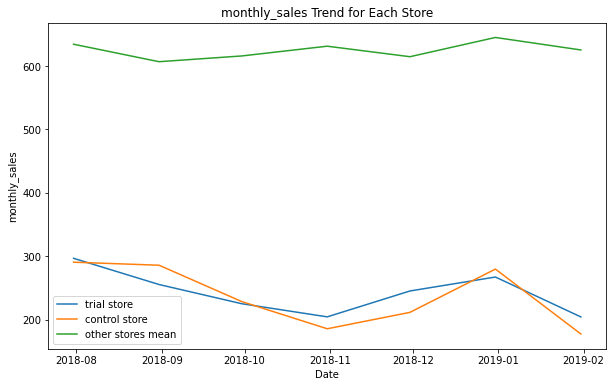

In [36]:
# monthly sales for store 77
control_viz (before_trial, 'monthly_sales',77,233)

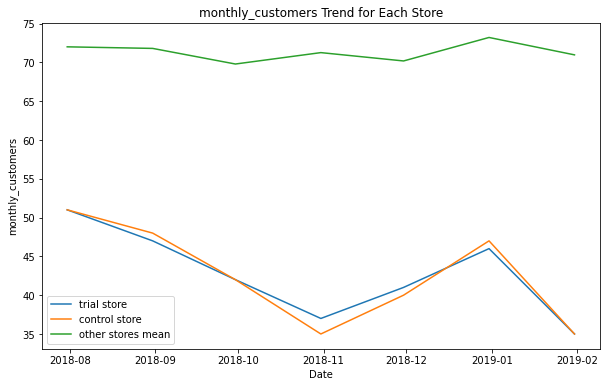

In [37]:
# number of customers for store 77
control_viz (before_trial, 'monthly_customers',77,233)

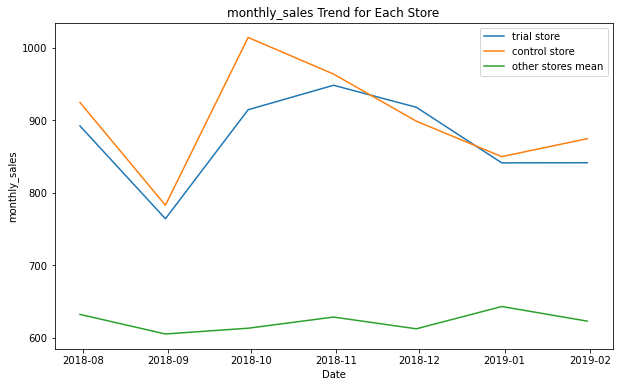

In [38]:
# monthly sales for store 86
control_viz (before_trial, 'monthly_sales',86,155)

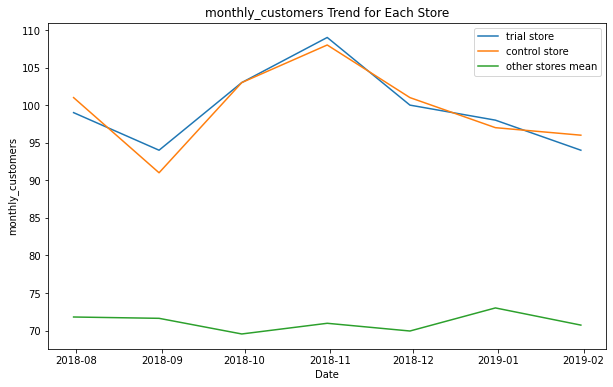

In [39]:
# number of customers for store 86
control_viz (before_trial, 'monthly_customers',86,155)

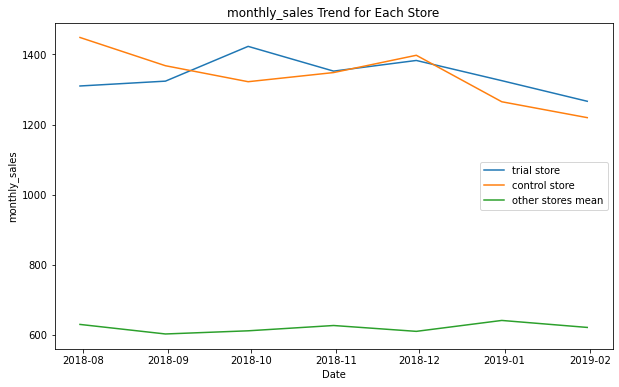

In [40]:
# monthly sales for store 88
control_viz (before_trial, 'monthly_sales',88,237)

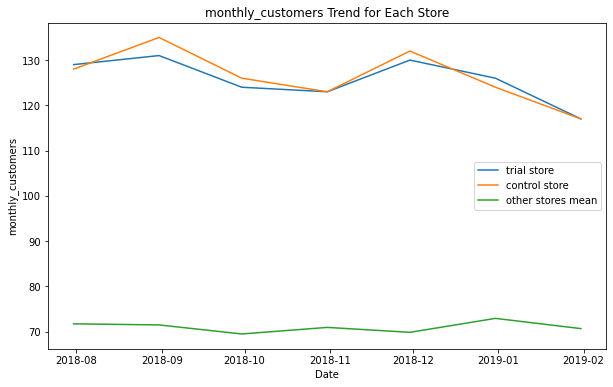

In [41]:
# number of customers for store 88
control_viz (before_trial, 'monthly_customers',88,237)

From the charts its clear that the control stores are quite similar to the trial store with regards to the key metrics compared to other stores

Since the control stores have been identified and verrified, lets analyze the effects of the experimental changes on the trial store

## Trial and control stores comparision during trial

the trial and control store pairs are identified below

77 --- 233

86 --- 155

88 --- 237

In [51]:
# create a function that visualizes the effect of the experiment on the performance of the trial store compared to the control store


def trial_comp(df, trial_store, control_store, metric):
    
    """
    Visualize the effect of the experiment on the performance of the trial store compared to the control store.

    Parameters:
    - df (DataFrame): The dataset containing key metrics of interest for different stores.
    - trial_store (int): The store number of concern (trial store).
    - control_store (int): The store number of the control store used for comparison.
    - metric (str): The particular metric of interest.

    Returns:
    - tuple: A tuple containing four values:
      1. abs_mean_per_diff_trial (float): Absolute mean percentage difference during the trial period.
      2. abs_mean_per_diff_out_trial (float): Absolute mean percentage difference outside the trial period.
      3. mean_per_diff_trial (float): Mean percentage difference during the trial period.
      4. mean_per_diff_out_trial (float): Mean percentage difference outside the trial period.
    
    Plots:
    This function plots a trend analysis of the metric of interest for the trial store in comparison with the control store
    """
    # Filtering data before the trial period and scaling the control store's metric values

    before_trial = df[df['DATE'] < '2019-02-01']
    scaler=(before_trial[before_trial['STORE_NBR'] == trial_store][metric].sum())/(before_trial[before_trial['STORE_NBR'] == control_store][metric].sum())
    key_metrics_control=df[df['STORE_NBR'] == control_store]
    key_metrics_control.loc[:,metric]= key_metrics_control[metric].copy()*scaler
    
    
    # Concatenating data for trial and control stores, and pivoting for visualization
    comp_df=pd.concat([key_metrics_control[['DATE','STORE_NBR',metric]],(df[['DATE','STORE_NBR',metric]][df['STORE_NBR'] == trial_store])],axis=0)
    comp_df= comp_df.pivot_table(index='DATE', columns='STORE_NBR', values=metric)
    comp_df['Percentage_Difference'] = ((comp_df[trial_store] - comp_df[control_store]) / comp_df[trial_store]) * 100
    
    # Plotting the trend of percentage difference
    plt.figure(figsize=(10, 6))
    comp_df['Percentage_Difference'].plot(marker='o', color='b', linestyle='-')
    comp_df.loc['2019-02-28':'2019-04-30', 'Percentage_Difference'].plot(marker='o', color='r', linestyle='-')
    plt.title(f'{metric} Percentage Difference Trend')
    plt.xlabel('Date')
    plt.ylabel(f'{metric} Percentage Difference (%)')
    plt.grid(False)

    plt.tight_layout()
    plt.show()
    
    
    # Calculating mean percentage differences
    abs_mean_per_diff_trial = np.abs(comp_df.loc['2019-02-28':'2019-04-30', 'Percentage_Difference']).mean()

    abs_mean_per_diff_out_trial= np.abs(comp_df.loc[~comp_df.index.isin(['2019-02-28', '2019-03-31', '2019-04-30']), 'Percentage_Difference']).mean()

    mean_per_diff_trial = comp_df.loc['2019-02-28':'2019-04-30', 'Percentage_Difference'].mean()
    
    mean_per_diff_out_trial = comp_df.loc[~comp_df.index.isin(['2019-02-28', '2019-03-31', '2019-04-30']), 'Percentage_Difference'].mean()

    
    
    return(abs_mean_per_diff_trial, abs_mean_per_diff_out_trial, mean_per_diff_trial, mean_per_diff_out_trial)

C:\Users\adenu\AppData\Local\Temp\ipykernel_4636\344965558.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_metrics_control.loc[:,metric]= key_metrics_control[metric].copy()*scaler


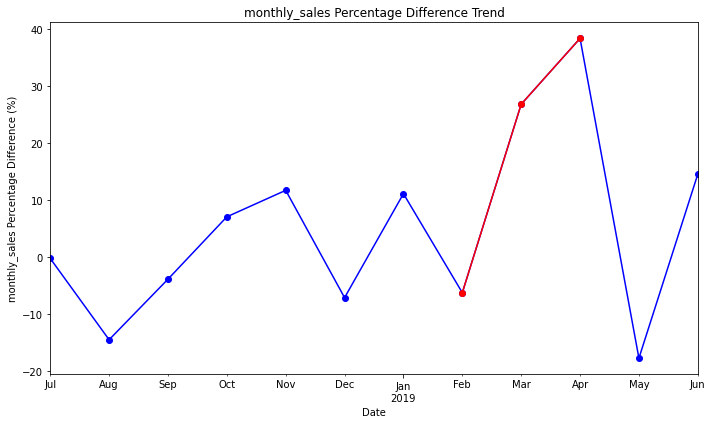

(23.830721392124897, 9.781918647831091, 19.64274351903243, 0.0839780928036353)

In [53]:
# examining monthly sales for store 77 and its control store
trial_comp(key_metrics, 77, 233, 'monthly_sales')

C:\Users\adenu\AppData\Local\Temp\ipykernel_4636\344965558.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_metrics_control.loc[:,metric]= key_metrics_control[metric].copy()*scaler


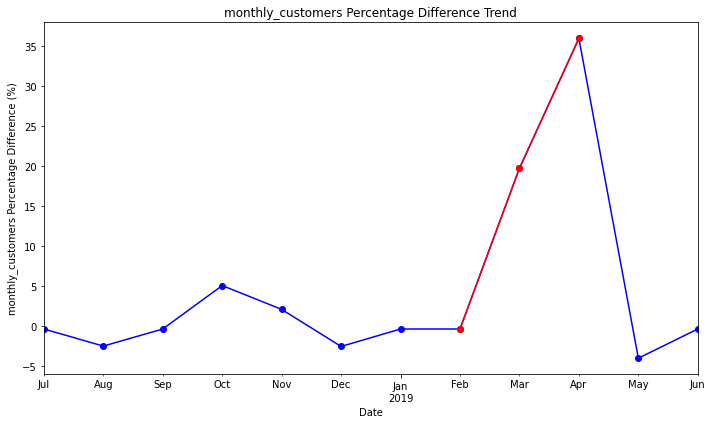

(18.67437764767481,
 1.9459088176501984,
 18.450664001142364,
 -0.34599494076791254)

In [54]:
# examining monthly customers for store 77 and its control store
trial_comp(key_metrics, 77, 233, 'monthly_customers')

In [55]:
# The performance of store 77 appears to be improved by the experiment

C:\Users\adenu\AppData\Local\Temp\ipykernel_4636\344965558.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_metrics_control.loc[:,metric]= key_metrics_control[metric].copy()*scaler


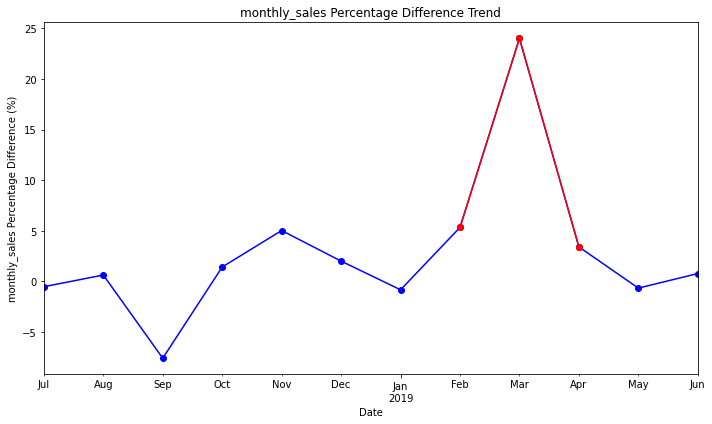

(10.913441027656347,
 2.1622643456930737,
 10.913441027656347,
 0.024167080187900467)

In [56]:
# examining monthly sales for store 86 and its control store
trial_comp(key_metrics, 86, 155, 'monthly_sales')

C:\Users\adenu\AppData\Local\Temp\ipykernel_4636\344965558.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_metrics_control.loc[:,metric]= key_metrics_control[metric].copy()*scaler


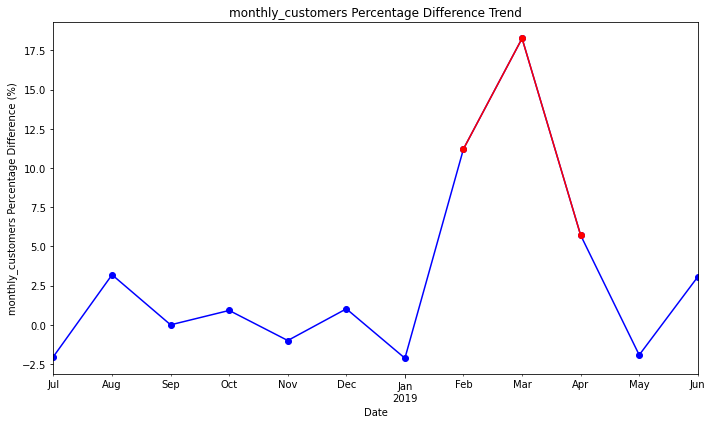

(11.73003618351038, 1.6957213027967701, 11.73003618351038, 0.12440163218631933)

In [57]:
# examining monthly customers for store 86 and its control store
trial_comp(key_metrics, 86, 155, 'monthly_customers')

The effect of the trial on store 86 appears to be mixed as its performance appears to be improved based on the experiment at first but subsequently deep after that below what was obtainable before the start of the experiment.

C:\Users\adenu\AppData\Local\Temp\ipykernel_4636\344965558.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_metrics_control.loc[:,metric]= key_metrics_control[metric].copy()*scaler


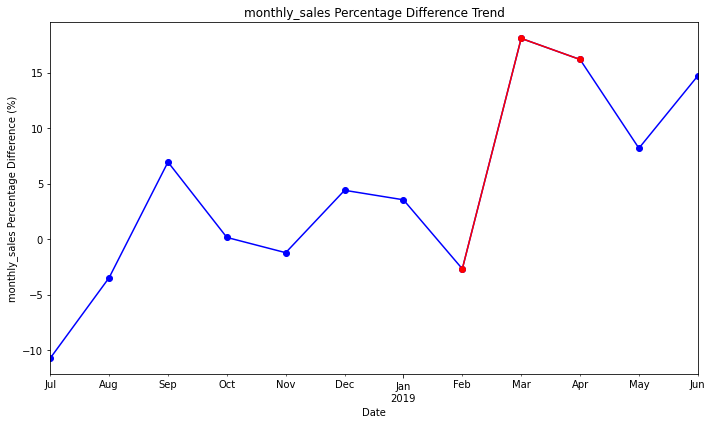

(12.316519292860292, 5.928728796277252, 10.526554668808608, 2.495450406364387)

In [58]:
# examining monthly sales for store 88 and its control store
trial_comp(key_metrics, 88, 237, 'monthly_sales')

C:\Users\adenu\AppData\Local\Temp\ipykernel_4636\344965558.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_metrics_control.loc[:,metric]= key_metrics_control[metric].copy()*scaler


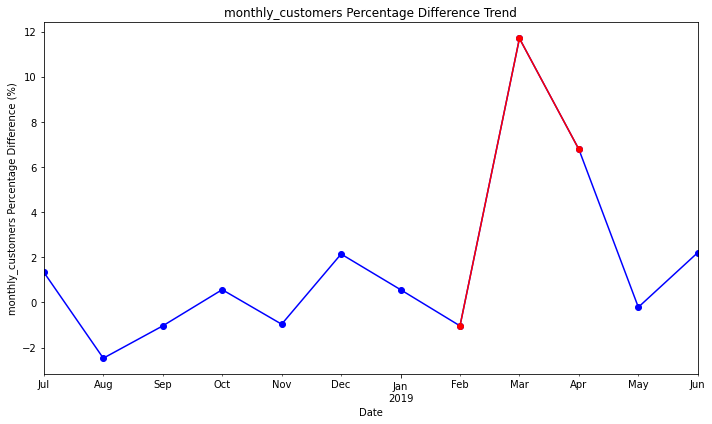

(6.504746179799017, 1.2782505068833288, 5.812200161938616, 0.23676302582388953)

In [59]:
# examining monthly customers for store 88 and its control store
trial_comp(key_metrics, 88, 237, 'monthly_customers')

In [60]:
# The performance of store 88 appears to be improved by the experiment

### Conclusion

From our analysis we can identify that the experiment positively affects the performance of store 77 and 88 but this was not the case for store 86. Further investigation is needed into how or why this happened